In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [55]:
data = pd.read_csv('../Cyber_salaries.csv')

In [56]:
warnings.filterwarnings('ignore')

In [57]:
data.drop(['salary','salary_currency'],inplace = True, axis = 1)

In [58]:
data.drop(['company_size','remote_ratio','work_year'],inplace = True, axis = 1) 

In [59]:
Q1 = np.percentile(data["salary_in_usd"], 25, interpolation = "midpoint")
Q3 = np.percentile(data['salary_in_usd'], 75, interpolation = "midpoint")
IQR = Q3-Q1
print('Old Shape: ',data.shape)

Old Shape:  (1349, 6)


In [60]:
# upper bound
upper =np.where(data["salary_in_usd"] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(data['salary_in_usd'] <= (Q1-1.5*IQR))

In [61]:
data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)
print('New Shape', data.shape)

New Shape (1311, 6)


In [62]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [63]:
data.dtypes

experience_level      category
employment_type       category
job_title             category
salary_in_usd            int64
employee_residence    category
company_location      category
dtype: object

In [64]:
newdf = data.copy()

In [146]:
newdf.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location
0,EN,FT,Information Security Officer,72762,DE,DE
1,SE,FT,Security Officer,123400,US,US
2,SE,FT,Security Officer,88100,US,US
3,SE,FT,Security Engineer,163575,US,US
4,SE,FT,Security Engineer,115800,US,US


In [65]:
from sklearn.preprocessing import LabelEncoder


In [66]:
encoder = LabelEncoder()

In [67]:
encoder = LabelEncoder()

data["experience_level"] = encoder.fit_transform(data["experience_level"])
experience_level_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

data["employment_type"] = encoder.fit_transform(data["employment_type"])
employment_type_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

data["job_title"] = encoder.fit_transform(data["job_title"])
job_title_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

data["employee_residence"] = encoder.fit_transform(data["employee_residence"])
employee_residence_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

data["company_location"] = encoder.fit_transform(data["company_location"])
company_location_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [68]:
employment_type_dict

{'CT': 0, 'FL': 1, 'FT': 2, 'PT': 3}

In [69]:
job_title_dict

{'Application Security Analyst': 0,
 'Application Security Engineer': 1,
 'Application Security Specialist': 2,
 'Azure Security Engineer': 3,
 'Chief Information Security Officer': 4,
 'Cloud Security Architect': 5,
 'Cloud Security Engineer': 6,
 'Cloud Security Engineering Manager': 7,
 'Computer Forensic Software Engineer': 8,
 'Concierge Security Engineer': 9,
 'Corporate Infrastructure Security Engineer': 10,
 'Corporate Security Engineer': 11,
 'Cyber Program Manager': 12,
 'Cyber Security Analyst': 13,
 'Cyber Security Architect': 14,
 'Cyber Security Consultant': 15,
 'Cyber Security Engineer': 16,
 'Cyber Security Researcher': 17,
 'Cyber Security Specialist': 18,
 'Cyber Security Training Specialist': 19,
 'Cyber Threat Analyst': 20,
 'Cyber Threat Intelligence Analyst': 21,
 'Data Security Analyst': 22,
 'Detection Engineer': 23,
 'DevOps Security Engineer': 24,
 'DevSecOps Engineer': 25,
 'Digital Forensics Analyst': 26,
 'Director of Information Security': 27,
 'Enterpris

In [70]:
X = data.drop(["salary_in_usd"], axis=1)
y = data["salary_in_usd"]

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [74]:
rfr.fit(X, y)


RandomForestRegressor(random_state=42)

In [75]:
train_preds = rfr.predict(X)


In [76]:
train_r2 = r2_score(y, train_preds)

In [77]:
print("Eğitim verileri için R-squared skoru: {:.2f}".format(train_r2))

Eğitim verileri için R-squared skoru: 0.72


In [78]:
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)


R-squared score: 0.7250048069141037


In [149]:
#param_grid = {
#    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
#    'max_features': ['auto', 'sqrt', 'log2',3,5,10,15],
#    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15],
#    'criterion' :['mse', 'mae']
#}

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
y_train_pred = rfr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Train R2 score:", r2_train)


Train R2 score: 0.721943694590161


In [83]:
y_test_pred = rfr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Test R2 score:", r2_test)

Test R2 score: 0.7250048069141037


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

y_train_pred = rfr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Train R2 score:", r2_train)


y_test_pred = rfr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Test R2 score:", r2_test)

Train MSE: 791372975.9860066
Test MSE: 830315459.7265594
Train MAE: 20575.618305509346
Test MAE: 20822.340443263318
Train R2 score: 0.721943694590161
Test R2 score: 0.7250048069141037


In [138]:
#kullanıcıdan değer alma
experience_level = input("Enter experience level: ")
employment_type = input("Enter employment type: ")
job_title = input("Enter job title: ")
employee_residence = input("Enter employee residence: ")
company_location = input("Enter company location: ")

Enter experience level: EN
Enter employment type: FT
Enter job title: Security Engineer
Enter employee residence: US
Enter company location: US


In [139]:
#değerleri bir listeye dönüştürme
user_inputs = [experience_level, employment_type, job_title, employee_residence, company_location]


In [140]:
print(user_inputs)

['EN', 'FT', 'Security Engineer', 'US', 'US']


In [141]:
def convertinputs(inputsparam):
    for i, val in enumerate(inputsparam):
        if i == 0:
            inputsparam[i] = experience_level_dict[val]
        elif i == 1:
            inputsparam[i] = employment_type_dict[val]
        elif i == 2:
            inputsparam[i] = job_title_dict[val]
        elif i == 3:
            inputsparam[i] = employee_residence_dict[val]
        elif i == 4:
            inputsparam[i] = company_location_dict[val]
    return inputsparam

In [142]:
convertinputs(user_inputs)

[0, 2, 67, 57, 54]

In [143]:
user_inputs

[0, 2, 67, 57, 54]

In [144]:
input_data = [user_inputs]
input_df = pd.DataFrame(input_data, columns=['experience_level', 'employment_type','job_title','employee_residence','company_location'])
input_df = pd.get_dummies(input_df)
prediction = rfr.predict(input_df)

print("Tahmini maaş: ${:.0f}".format(prediction[0]))

Tahmini maaş: $87215


Text(0, 0.5, 'Predicted Y')

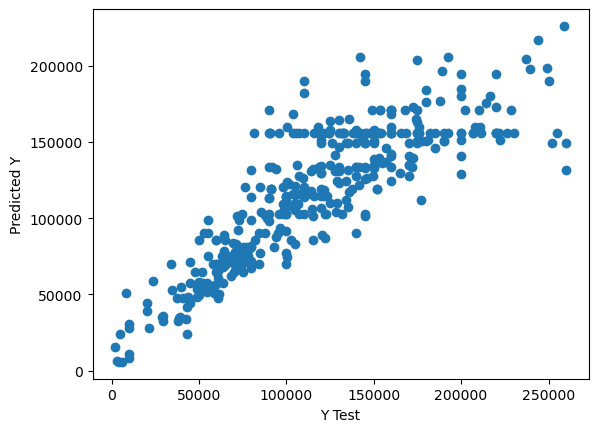

In [156]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#random forest regression